In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
raw_data = pd.read_excel('ניתוחי יתרון לגודל- לפי מפעילות.xlsx')

In [60]:
def load_data_rename_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    column_mapping = {
        'שם תחנה' : 'Name',
        'תקן רופאים בפועל': 'actual_doctor_standard',
        'מספר תקני אחיות': 'number_of_nurse_positions',
        'מספר עובדי אדמיניסטרציה ומעטפת': 'number_of_administrative_staff',
        'מספר תינוקות מטופלים (0-1)': 'number_of_babies_treated',
        'עלות תחנה חודשית': 'monthly_station_cost',
        'עלות כ\'\'א שנתית לתינוק': 'annual_cost_per_baby'
    }

    df = df.rename(columns=column_mapping)

    if df.isnull().values.any():
        print("Missing values found. Filling missing values with the median of each column.")
        df = df.fillna(0)
    return df

## Macabi

In [61]:
macabi_data = load_data_rename_data('ניתוחי יתרון לגודל- לפי מפעילות.xlsx', 'נתוני תחנות מכבי')

Missing values found. Filling missing values with the median of each column.


In [62]:
macabi_data.head()

,Name,actual_doctor_standard,number_of_nurse_positions,number_of_administrative_staff,number_of_babies_treated,monthly_station_cost,annual_cost_per_baby
0,גן יבנה,0.253125,1.20,0.000000,172,61575.000000,4295.930233
1,שקף,0.000000,0.17,0.000000,19,4420.000000,2791.578947
2,סעד,0.000000,0.15,0.000000,2,3900.000000,23400.000000
3,נווה זאב- באר שבע,0.421875,3.80,0.494505,454,156842.582418,4145.618919
4,יבנה,0.843750,3.80,0.494505,471,207467.582418,5285.798278


In [63]:
def analyze_and_plot(df):
    #plotting the sidtibution of the data
    columns = df.columns.drop(['Name', 'monthly_station_cost', 'annual_cost_per_baby'])
    for column in columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True, color='blue')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  # Display each histogram individually
    plt.show()

    corr_mart = df.corr()

    # Plotting the heatmap for the correlation matrix
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(corr_mart, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
    plt.title('Correlation Matrix Heatmap')
    plt.show()  # Display the heatmap

    # Printing statistical summaries of the DataFrame
    print("Statistical Summary:")
    print(df.describe().transpose())


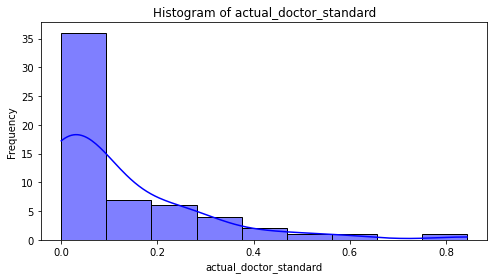

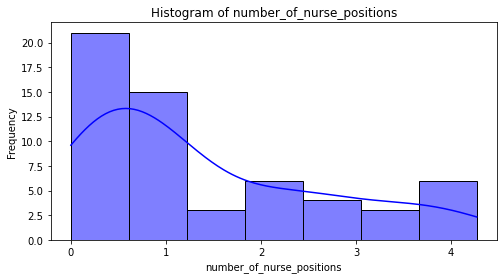

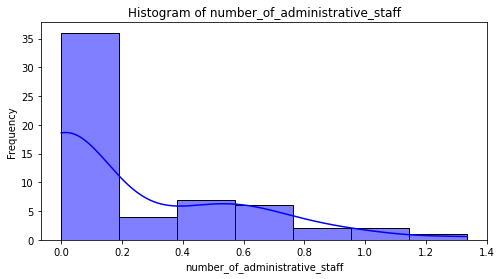

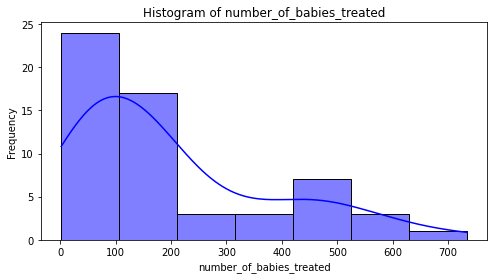

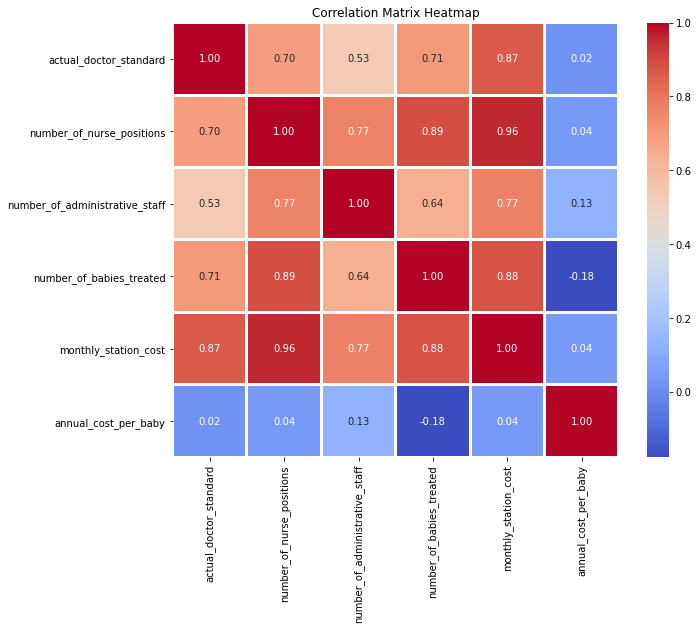

Statistical Summary:
                                count          mean           std  min  \
actual_doctor_standard           58.0      0.118557      0.168492  0.0   
number_of_nurse_positions        58.0      1.398914      1.253029  0.0   
number_of_administrative_staff   58.0      0.234113      0.333398  0.0   
number_of_babies_treated         58.0    203.482759    180.603884  2.0   
monthly_station_cost             58.0  54110.246921  52624.010921  0.0   
annual_cost_per_baby             58.0   3719.797583   3408.421553  0.0   

                                         25%           50%           75%  \
actual_doctor_standard              0.000000      0.056250      0.189844   
number_of_nurse_positions           0.405000      0.975000      2.195000   
number_of_administrative_staff      0.000000      0.000000      0.494505   
number_of_babies_treated           68.250000    150.000000    301.750000   
monthly_station_cost            13108.937500  32673.125000  72744.093407   
annu

In [64]:
analyze_and_plot(macabi_data)

In [65]:
def run_regression_and_plot(df):
    df['log_annual_cost_per_baby'] = np.log(df['annual_cost_per_baby']+1)

    X = df[['actual_doctor_standard', 'number_of_nurse_positions', 'number_of_administrative_staff', 'number_of_babies_treated']]
    X = sm.add_constant(X)

    y = df['log_annual_cost_per_baby']

    model = sm.OLS(y, X).fit()

    print(model.summary()) 

    for predictor in X.columns[1:]:  # Skip the constant
        plt.figure(figsize=(8, 4))
        sns.regplot(x=predictor, y='log_annual_cost_per_baby', data=df, line_kws={'color': 'red'})
        plt.title(f'Regression Line for {predictor} vs Log of Annual Cost per Baby')
        plt.show() 

                               OLS Regression Results                               
Dep. Variable:     log_annual_cost_per_baby   R-squared:                       0.285
Model:                                  OLS   Adj. R-squared:                  0.231
Method:                       Least Squares   F-statistic:                     5.274
Date:                      Fri, 02 Aug 2024   Prob (F-statistic):            0.00119
Time:                              14:58:47   Log-Likelihood:                -98.659
No. Observations:                        58   AIC:                             207.3
Df Residuals:                            53   BIC:                             217.6
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


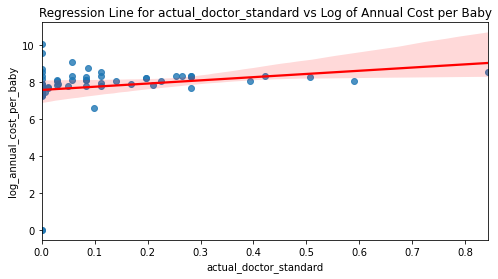

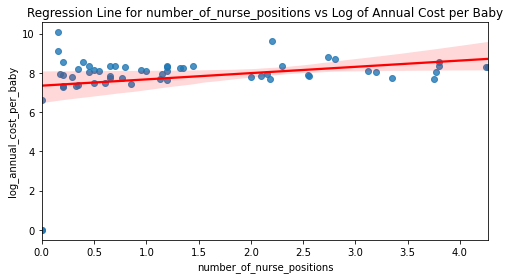

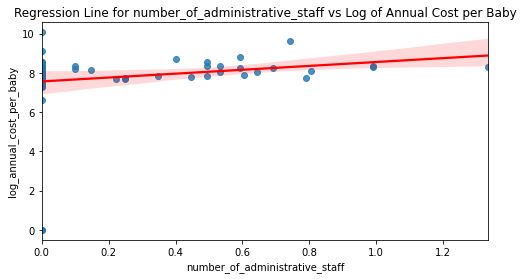

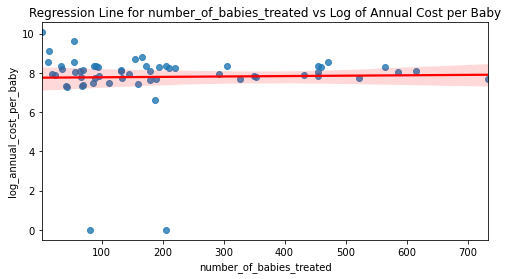

In [66]:
run_regression_and_plot(macabi_data)

In [67]:
coefficients = {
    'actual_doctor_standard': 1.9228,
    'number_of_nurse_positions': 1.4461,
    'number_of_administrative_staff': -0.4029,
    'number_of_babies_treated': -0.0095
}

for var, coef in coefficients.items():
    percentage_change = (np.exp(coef) - 1) * 100
    print(f"Percentage change for {var}: {percentage_change:.2f}%")

Percentage change for actual_doctor_standard: 584.01%
Percentage change for number_of_nurse_positions: 324.65%
Percentage change for number_of_administrative_staff: -33.16%
Percentage change for number_of_babies_treated: -0.95%


## Leumit

In [72]:
leumit_data = load_data_rename_data('ניתוחי יתרון לגודל- לפי מפעילות.xlsx', 'נתוני תחנה לאומית')

Missing values found. Filling missing values with the median of each column.


In [92]:
leumit_data.head()

,Name,actual_doctor_standard,number_of_nurse_positions,number_of_babies_treated,monthly_station_cost,annual_cost_per_baby,log_annual_cost_per_baby
0,קרית גת רמות דוד,0.112500,1.3,100,46346.942814,5561.633138,8.623827
1,קרית מלאכי,0.140625,1.4,149,51904.825777,4180.254425,8.338367
2,קרית גת שער דרום,0.140625,1.0,81,41186.865351,6101.757830,8.716496
3,חורה א',0.000000,0.6,54,16076.940639,3572.653475,8.181344
4,יבנה,0.084375,0.4,37,19353.138998,6276.693729,8.744758


In [76]:
def leumit_run_regression_and_plot(df):
    df['log_annual_cost_per_baby'] = np.log(df['annual_cost_per_baby']+1)

    X = df[['actual_doctor_standard', 'number_of_nurse_positions', 'number_of_babies_treated']]
    X = sm.add_constant(X)

    y = df['log_annual_cost_per_baby']

    model = sm.OLS(y, X).fit()

    print(model.summary()) 

    for predictor in X.columns[1:]:  # Skip the constant
        plt.figure(figsize=(8, 4))
        sns.regplot(x=predictor, y='log_annual_cost_per_baby', data=df, line_kws={'color': 'red'})
        plt.title(f'Regression Line for {predictor} vs Log of Annual Cost per Baby')
        plt.show() 

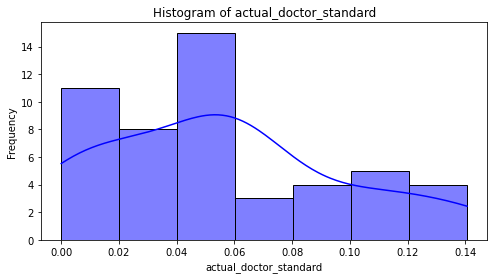

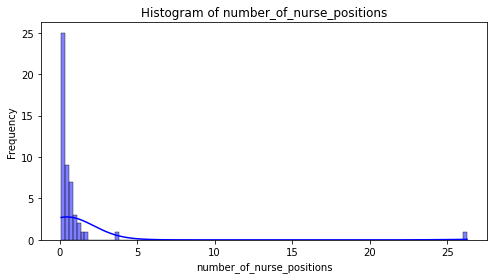

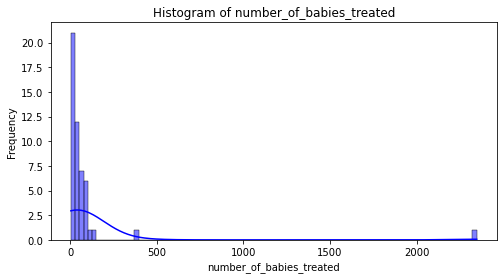

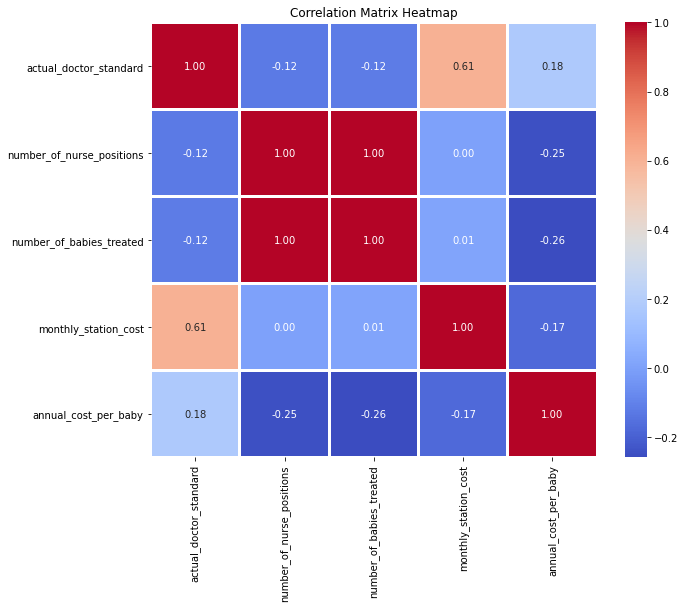

Statistical Summary:
                           count          mean           std  min  \
actual_doctor_standard      50.0      0.055969      0.041899  0.0   
number_of_nurse_positions   50.0      1.051000      3.689336  0.1   
number_of_babies_treated    50.0     93.880000    330.209682  4.0   
monthly_station_cost        50.0  19808.722296  18473.993229  0.0   
annual_cost_per_baby        50.0   6708.719298   4680.551099  0.0   

                                    25%           50%           75%  \
actual_doctor_standard         0.028125      0.056250      0.080859   
number_of_nurse_positions      0.212500      0.350000      0.675000   
number_of_babies_treated      16.000000     33.500000     61.250000   
monthly_station_cost       10916.863177  13994.158785  21784.000666   
annual_cost_per_baby        4230.500987   5536.359289   7433.327011   

                                     max  
actual_doctor_standard          0.140625  
number_of_nurse_positions      26.275000  
number_o

In [ ]:
analyze_and_plot(leumit_data)

                               OLS Regression Results                               
Dep. Variable:     log_annual_cost_per_baby   R-squared:                       0.904
Model:                                  OLS   Adj. R-squared:                  0.897
Method:                       Least Squares   F-statistic:                     143.6
Date:                      Fri, 02 Aug 2024   Prob (F-statistic):           2.29e-23
Time:                              19:23:16   Log-Likelihood:                -26.550
No. Observations:                        50   AIC:                             61.10
Df Residuals:                            46   BIC:                             68.75
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


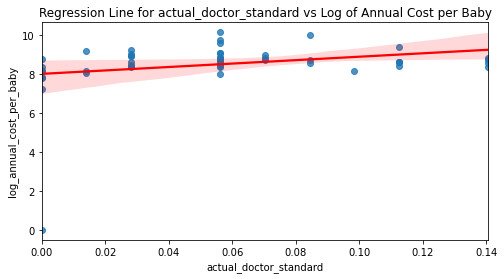

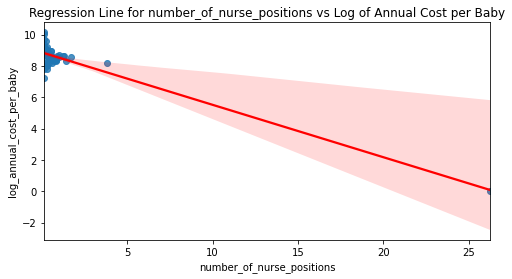

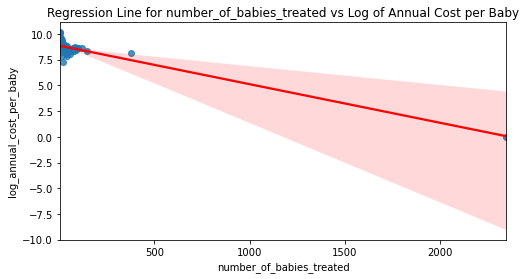

In [77]:
leumit_run_regression_and_plot(leumit_data)

In [78]:
percentage_change = (np.exp(-0.0189) - 1) * 100
print(f"Percentage change for {var}: {percentage_change:.2f}%")

Percentage change for number_of_babies_treated: -1.87%


## Meuhedet

In [87]:
meuhedet_data = load_data_rename_data('ניתוחי יתרון לגודל- לפי מפעילות.xlsx', 'נתוני תחנה מאוחדת')

In [88]:
meuhedet_data.head()

,Name,number_of_babies_treated,actual_doctor_standard,number_of_nurse_positions,number_of_administrative_staff,monthly_station_cost,annual_cost_per_baby
0,אבני נזר /קרית ספר– מודיעין עילית,557,0.325,3.7250,1.48,136799.284988,2947.201831
1,גבעת זאב,333,1.000,1.7500,1.00,136400.808540,4915.344452
2,ברכפלד – מודיעין עילית,262,0.140,1.5875,0.55,57267.850175,2622.954970
3,הוד השרון (החדשה),245,0.100,1.8500,1.00,66808.393416,3272.247841
4,קריית גת,234,0.125,2.1000,0.50,67693.319008,3471.452257


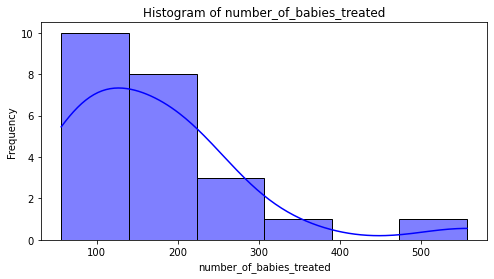

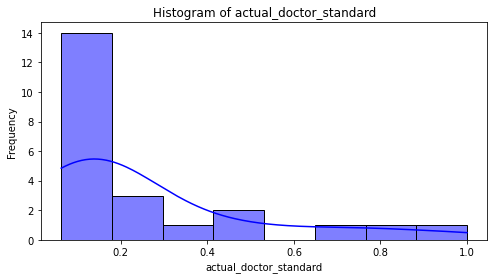

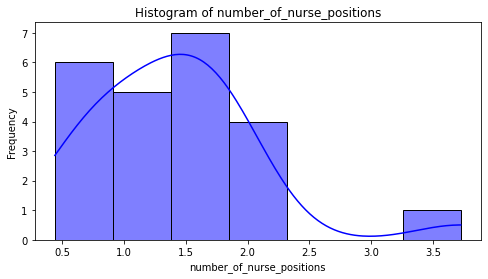

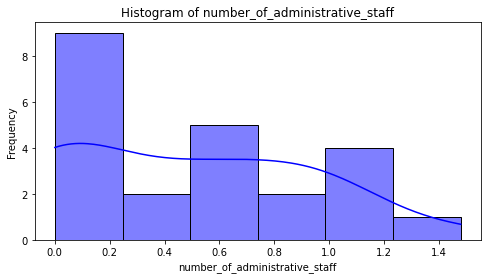

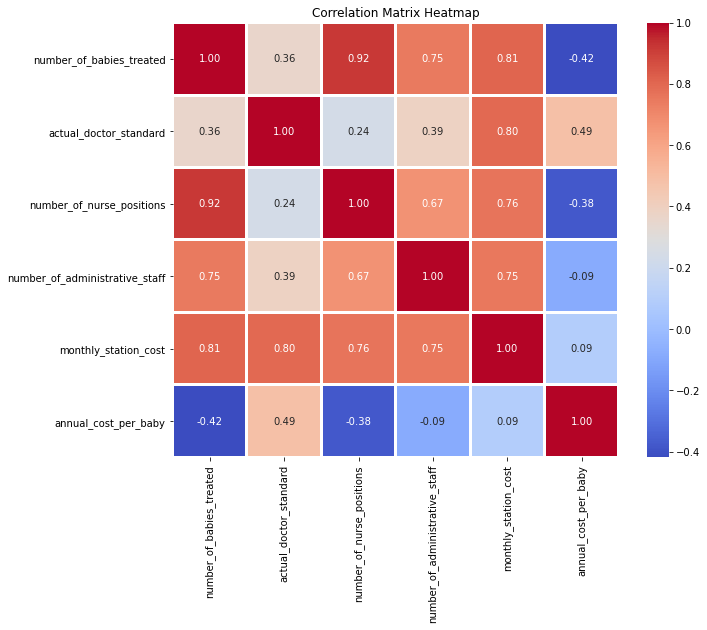

Statistical Summary:
                                count          mean           std  \
number_of_babies_treated         23.0    169.739130    112.554721   
actual_doctor_standard           23.0      0.264239      0.257923   
number_of_nurse_positions        23.0      1.408043      0.694742   
number_of_administrative_staff   23.0      0.479022      0.450148   
monthly_station_cost             23.0  61873.689511  34016.336283   
annual_cost_per_baby             23.0   4785.002935   1544.724833   

                                         min           25%           50%  \
number_of_babies_treated           56.000000     90.000000    161.000000   
actual_doctor_standard              0.062500      0.100000      0.150000   
number_of_nurse_positions           0.440000      0.950000      1.400000   
number_of_administrative_staff      0.000000      0.000000      0.500000   
monthly_station_cost            20445.509259  35881.537423  55687.791284   
annual_cost_per_baby             2622.9

In [89]:
analyze_and_plot(meuhedet_data)

                               OLS Regression Results                               
Dep. Variable:     log_annual_cost_per_baby   R-squared:                       0.782
Model:                                  OLS   Adj. R-squared:                  0.734
Method:                       Least Squares   F-statistic:                     16.16
Date:                      Fri, 02 Aug 2024   Prob (F-statistic):           8.87e-06
Time:                              19:31:54   Log-Likelihood:                 11.708
No. Observations:                        23   AIC:                            -13.42
Df Residuals:                            18   BIC:                            -7.739
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


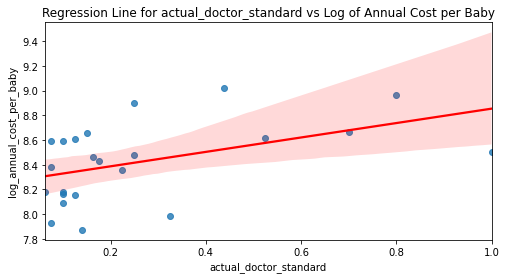

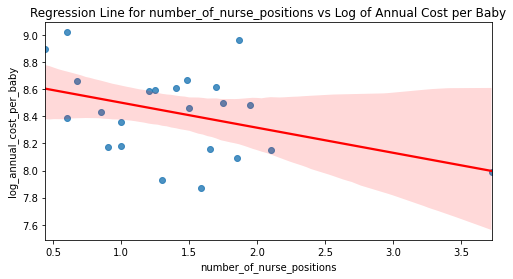

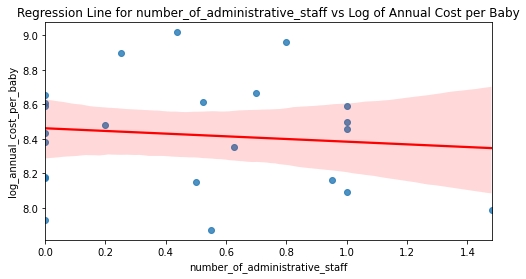

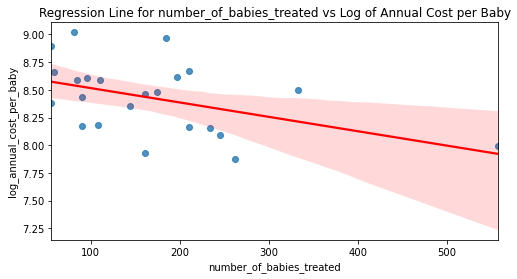

In [90]:
run_regression_and_plot(meuhedet_data)

In [91]:
percentage_change = (np.exp(-0.0044) - 1) * 100
print(f"Percentage change for {var}: {percentage_change:.2f}%")

Percentage change for number_of_babies_treated: -0.44%


## Generalized Linear Models (GLM's)

In [93]:
def fit_glm(df, supplier_name):
    # Ensure that all cost values are positive (required for Gamma model)
    df = df[df['annual_cost_per_baby'] > 0]

    # Define the model formula
    if supplier_name != 'Leumit':
        formula = 'annual_cost_per_baby ~ actual_doctor_standard + number_of_nurse_positions + number_of_administrative_staff + number_of_babies_treated'
    else:
        formula = 'annual_cost_per_baby ~ actual_doctor_standard + number_of_nurse_positions + number_of_babies_treated'
    
    # Fit a GLM model with a Gamma family and log link function
    model = sm.GLM.from_formula(formula, data=df, family=sm.families.Gamma(sm.families.links.log()))
    result = model.fit()
    
    # Print the summary of the model
    print(result.summary())
    
    # Plotting predicted vs actual values to assess the model
    df['predicted_cost'] = result.predict(df)
    plt.figure(figsize=(10, 6))
    plt.scatter(df['annual_cost_per_baby'], df['predicted_cost'], alpha=0.5)
    plt.plot([df['annual_cost_per_baby'].min(), df['annual_cost_per_baby'].max()], 
             [df['annual_cost_per_baby'].min(), df['annual_cost_per_baby'].max()], 'r--')
    plt.title('Actual vs. Predicted Cost')
    plt.xlabel('Actual Cost')
    plt.ylabel('Predicted Cost')
    plt.show()

    return result

                  Generalized Linear Model Regression Results                   
Dep. Variable:     annual_cost_per_baby   No. Observations:                   56
Model:                              GLM   Df Residuals:                       51
Model Family:                     Gamma   Df Model:                            4
Link Function:                      log   Scale:                         0.55416
Method:                            IRLS   Log-Likelihood:                -501.01
Date:                  Fri, 02 Aug 2024   Deviance:                       12.735
Time:                          19:40:15   Pearson chi2:                     28.3
No. Iterations:                      29                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

<ipython-input-93-7d55fde5d449>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_cost'] = result.predict(df)


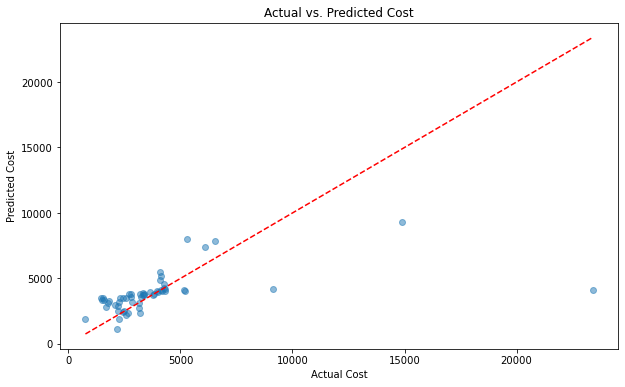

In [94]:
fit_glm(macabi_data, 'Macabi')

In [101]:
coef = -0.0045
percentage_change = (np.exp(coef) - 1) * 100
print(f"Percentage change per unit increase in number of babies treated: {percentage_change:.2f}%")


Percentage change per unit increase in number of babies treated: -0.45%


                  Generalized Linear Model Regression Results                   
Dep. Variable:     annual_cost_per_baby   No. Observations:                   49
Model:                              GLM   Df Residuals:                       45
Model Family:                     Gamma   Df Model:                            3
Link Function:                      log   Scale:                         0.30864
Method:                            IRLS   Log-Likelihood:                -458.32
Date:                  Fri, 02 Aug 2024   Deviance:                       9.7386
Time:                          19:40:21   Pearson chi2:                     13.9
No. Iterations:                     100                                         
Covariance Type:              nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

<ipython-input-93-7d55fde5d449>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_cost'] = result.predict(df)


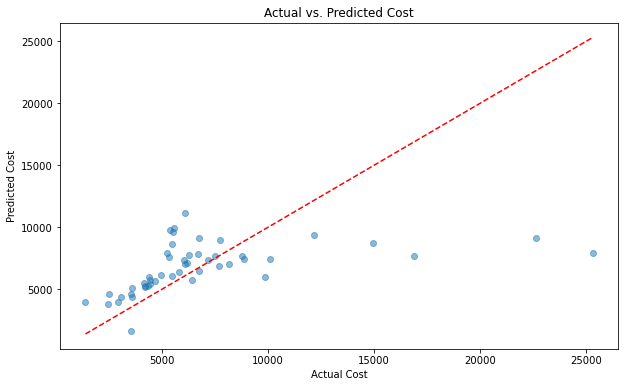

In [95]:
fit_glm(leumit_data, 'Leumit')

In [100]:
coef = -0.0185   
percentage_change = (np.exp(coef) - 1) * 100
print(f"Percentage change per unit increase in number of babies treated: {percentage_change:.2f}%")


Percentage change per unit increase in number of babies treated: -1.83%


                  Generalized Linear Model Regression Results                   
Dep. Variable:     annual_cost_per_baby   No. Observations:                   23
Model:                              GLM   Df Residuals:                       18
Model Family:                     Gamma   Df Model:                            4
Link Function:                      log   Scale:                        0.030889
Method:                            IRLS   Log-Likelihood:                -183.21
Date:                  Fri, 02 Aug 2024   Deviance:                      0.50889
Time:                          19:40:53   Pearson chi2:                    0.556
No. Iterations:                      14                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

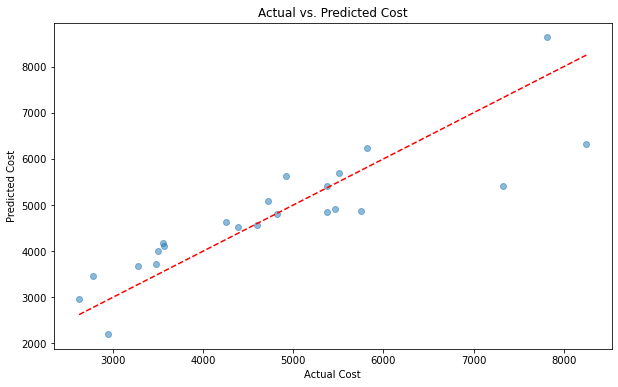

In [97]:
fit_glm(meuhedet_data, 'meuhedet')

In [98]:
coef = -0.0043
percentage_change = (np.exp(coef) - 1) * 100
print(f"Percentage change per unit increase in number of babies treated: {percentage_change:.2f}%")


Percentage change per unit increase in number of babies treated: -0.43%


## Elastic Net

In [102]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

def fit_elastic_net(X, y, alpha=1.0, l1_ratio=0.5):
    """
    Fits an Elastic Net model to the data and prints the model summary.
    
    Parameters:
    - X: pandas DataFrame, Predictor variables
    - y: pandas Series, Response variable
    - alpha: float, The constant that multiplies the penalty terms. Default is 1.0.
    - l1_ratio: float, The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1.
              l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.
    
    Returns:
    - model: The fitted Elastic Net model
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardizing the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize the ElasticNet model
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predicting and evaluating the model
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Printing model coefficients and RMSE
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("Root Mean Squared Error (RMSE) on Test set:", rmse)
    
    return model

# Example usage:
# Assuming 'df' is your DataFrame and 'target' is your target column
# X = df.drop('target', axis=1)
# y = df['target']
# model = fit_elastic_net(X, y, alpha=0.1, l1_ratio=0.7)


In [103]:
fit_elastic_net(macabi_data[['actual_doctor_standard', 'number_of_nurse_positions', 'number_of_administrative_staff', 'number_of_babies_treated']], macabi_data['annual_cost_per_baby'])

Coefficients: [  79.32482048  380.59110157  537.83096515 -915.17471416]
Intercept: 3763.7739091871
Root Mean Squared Error (RMSE) on Test set: 928.7367951320862


ElasticNet(random_state=42)